In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from mne.decoding import ReceptiveField
import pickle
import numpy as np
import modin.pandas as pd
import os
from tqdm import tqdm
from matplotlib.pyplot import MultipleLocator
from matplotlib.gridspec import GridSpec
from utils import returnSpec
from distributed import Client
client = Client()


Perhaps you already have a cluster running?
Hosting the HTTP server on port 58669 instead


In [26]:
spectral = []
add = 'results/exp-1/ssvep'
subs = os.listdir(add)

for sub in subs:
    subFolder = add+os.sep+sub
    f = pd.read_csv(subFolder+os.sep+'SNR.csv')
    spectral.append(f)

spectral = pd.concat(spectral, ignore_index=True).drop_duplicates()
spectral.head()

,Unnamed: 0,channel,frequency,amplitude,condition,subject
0,0,O1,1.2,NaN,30,huangchangxing
1,1,OZ,1.2,NaN,30,huangchangxing
2,2,O2,1.2,NaN,30,huangchangxing
3,3,POZ,1.2,NaN,30,huangchangxing
4,4,PZ,1.2,NaN,30,huangchangxing


<AxesSubplot:xlabel='frequency', ylabel='amplitude'>

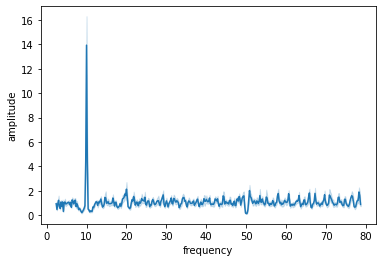

In [33]:
sns.lineplot(data=spectral[(spectral.condition==20)&(spectral.frequency<80)], x='frequency', y='amplitude')
